In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def read_csv(file_loc: str) -> pd.DataFrame:
    return pd.read_csv(file_loc, true_values=["resolved"], false_values=["floor"], na_values=[''])

df = pd.concat([read_csv("file_3_Mar18_Output_1.csv"), read_csv("file_3_Mar18_Output_1.csv")], ignore_index=True)

In [66]:
df["account_open_date_13_march"] = pd.to_datetime(df["account_open_date_13_march"])
df["account_open_date_18_march"] = pd.to_datetime(df["account_open_date_18_march"])

# Cleanup
df["delinquency_history_13_march_present"] = df["delinquency_history_13_march"].str.get(1).astype(int)
df["delinquency_history_13_march_past"] = df["delinquency_history_13_march"].str.get(2).astype(int)
df["delinquency_history_18_march_present"] = df["delinquency_history_18_march"].str.get(1).astype(int)
df["delinquency_history_18_march_past"] = df["delinquency_history_18_march"].str.get(2).astype(int)
df["ebill_enrolled_status_18_march"] =  df["ebill_enrolled_status_18_march"].fillna("NA").replace(r"^\s*$", "NA", regex=True)
df["ebill_enrolled_status_13_march"] =  df["ebill_enrolled_status_13_march"].fillna("NA").replace(r"^\s*$", "NA", regex=True)
df["account_status_18_march"] =  df["account_status_18_march"].fillna("NA").replace(r"^\s*$", "NA", regex=True)
df["account_status_13_march"] =  df["account_status_13_march"].fillna("NA").replace(r"^\s*$", "NA", regex=True)
df["card_activation_status_13_march"] = df["card_activation_status_13_march"].replace(r"^\s*$", -1, regex=True)
df["card_activation_status_18_march"] = df["card_activation_status_18_march"].replace(r"^\s*$", -1, regex=True)
df["account_open_date_13_march"] = np.log((df["account_open_date_13_march"] - min(df["account_open_date_13_march"])).astype('int64') + 1)
df["account_open_date_18_march"] = np.log((df["account_open_date_18_march"] - min(df["account_open_date_18_march"])).astype('int64') + 1)
df[["day", "time_of_day"]] = df["timestamp_call_key"].str.split(" ").str[0].str.extract(r'(\d{6})(\d{6})')

df = df.drop(["delinquency_history_13_march", "delinquency_history_18_march"], axis=1)

df = df.drop_duplicates().reset_index()
df = df.set_index("timestamp_call_key")

df

,index,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,account_open_date_13_march,account_status_13_march,...,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march,delinquency_history_13_march_present,delinquency_history_13_march_past,delinquency_history_18_march_present,delinquency_history_18_march_past,day,time_of_day
timestamp_call_key,,,,,,,,,,,,,,,,,,,,,
240315173250 DAL1OA3M,0,D,10010009499,PP,IA PP TR,True,1.0,NaN,42.040285,NA,...,0,1,E,0,0,0,0,0,240315,173250
240315124742 DAL15XHK,1,E,10006021998,BA,IA BA TS nl TR,False,2.0,143.28,41.856014,NA,...,0,1,E,0,0,0,0,0,240315,124742
240317114237 DAL3BLK6,2,J,10016007830,PT,IA AA BA MR nl PT TR,True,12.0,0.00,42.112479,NA,...,8,0,NA,0,0,0,0,0,240317,114237
240314120849 PHX6PL4U,3,E,10008003199,BA,IA BA,True,2.0,44.98,42.211587,NA,...,0,0,L,0,0,0,0,0,240314,120849
240314145902 DAL68RYS,4,I,10013002037,BA,IA BA TS nl mm TR,False,6.0,7.00,42.180308,NA,...,0,1,NA,0,0,0,0,0,240314,145902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240315165941 PHX67C7R,904628,E,10008016957,PT,IA BA nl PT TR,True,6.0,4431.60,41.924628,E,...,0,0,NA,0,0,6,0,6,240315,165941
240315180137 PHX2GWK4,904629,B,10002066257,BA,IA PP BA,True,3.0,100.54,42.193453,NA,...,0,1,E,0,0,0,0,0,240315,180137
240314142306 DAL33PKW,904630,E,10008004931,BA,IA BA,True,2.0,2504.35,42.204972,NA,...,0,0,L,0,0,0,0,0,240314,142306


In [67]:
df["recall"] = 1
recalls = df[["serial", "day", "recall"]]
recalls = recalls.groupby(["serial", "day"])["recall"].cumsum()
df["recall"] = recalls - 1
df

,index,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,account_open_date_13_march,account_status_13_march,...,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march,delinquency_history_13_march_present,delinquency_history_13_march_past,delinquency_history_18_march_present,delinquency_history_18_march_past,day,time_of_day,recall
timestamp_call_key,,,,,,,,,,,,,,,,,,,,,
240315173250 DAL1OA3M,0,D,10010009499,PP,IA PP TR,True,1.0,NaN,42.040285,NA,...,1,E,0,0,0,0,0,240315,173250,0
240315124742 DAL15XHK,1,E,10006021998,BA,IA BA TS nl TR,False,2.0,143.28,41.856014,NA,...,1,E,0,0,0,0,0,240315,124742,0
240317114237 DAL3BLK6,2,J,10016007830,PT,IA AA BA MR nl PT TR,True,12.0,0.00,42.112479,NA,...,0,NA,0,0,0,0,0,240317,114237,0
240314120849 PHX6PL4U,3,E,10008003199,BA,IA BA,True,2.0,44.98,42.211587,NA,...,0,L,0,0,0,0,0,240314,120849,0
240314145902 DAL68RYS,4,I,10013002037,BA,IA BA TS nl mm TR,False,6.0,7.00,42.180308,NA,...,1,NA,0,0,0,0,0,240314,145902,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240315165941 PHX67C7R,904628,E,10008016957,PT,IA BA nl PT TR,True,6.0,4431.60,41.924628,E,...,0,NA,0,0,6,0,6,240315,165941,0
240315180137 PHX2GWK4,904629,B,10002066257,BA,IA PP BA,True,3.0,100.54,42.193453,NA,...,1,E,0,0,0,0,0,240315,180137,0
240314142306 DAL33PKW,904630,E,10008004931,BA,IA BA,True,2.0,2504.35,42.204972,NA,...,0,L,0,0,0,0,0,240314,142306,0


In [71]:
df["floor_recall"] = 1
floor_recalls = df[df.resolved == False][["serial", "day", "floor_recall"]]
floor_recalls = floor_recalls.groupby(["serial", "day"])["floor_recall"].cumsum()
df["floor_recall"] = floor_recalls - 1
df

,index,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,account_open_date_13_march,account_status_13_march,...,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march,delinquency_history_13_march_present,delinquency_history_13_march_past,delinquency_history_18_march_present,delinquency_history_18_march_past,day,time_of_day,recall,floor_recall
timestamp_call_key,,,,,,,,,,,,,,,,,,,,,
240315173250 DAL1OA3M,0,D,10010009499,PP,IA PP TR,True,1.0,NaN,42.040285,NA,...,E,0,0,0,0,0,240315,173250,0,NaN
240315124742 DAL15XHK,1,E,10006021998,BA,IA BA TS nl TR,False,2.0,143.28,41.856014,NA,...,E,0,0,0,0,0,240315,124742,0,0.0
240317114237 DAL3BLK6,2,J,10016007830,PT,IA AA BA MR nl PT TR,True,12.0,0.00,42.112479,NA,...,NA,0,0,0,0,0,240317,114237,0,NaN
240314120849 PHX6PL4U,3,E,10008003199,BA,IA BA,True,2.0,44.98,42.211587,NA,...,L,0,0,0,0,0,240314,120849,0,NaN
240314145902 DAL68RYS,4,I,10013002037,BA,IA BA TS nl mm TR,False,6.0,7.00,42.180308,NA,...,NA,0,0,0,0,0,240314,145902,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240315165941 PHX67C7R,904628,E,10008016957,PT,IA BA nl PT TR,True,6.0,4431.60,41.924628,E,...,NA,0,0,6,0,6,240315,165941,0,NaN
240315180137 PHX2GWK4,904629,B,10002066257,BA,IA PP BA,True,3.0,100.54,42.193453,NA,...,E,0,0,0,0,0,240315,180137,0,NaN
240314142306 DAL33PKW,904630,E,10008004931,BA,IA BA,True,2.0,2504.35,42.204972,NA,...,L,0,0,0,0,0,240314,142306,0,NaN


In [74]:
df[df.floor_recall > 0]

,index,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,account_open_date_13_march,account_status_13_march,...,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march,delinquency_history_13_march_present,delinquency_history_13_march_past,delinquency_history_18_march_present,delinquency_history_18_march_past,day,time_of_day,recall,floor_recall
timestamp_call_key,,,,,,,,,,,,,,,,,,,,,
240314151323 PHX4I30S,5,I,10013002037,PS,IA BA TS nl PS nl mt RS TR,False,6.0,7.00,42.180308,NA,...,NA,0,0,0,0,0,240314,151323,1,1.0
240314081822 DAL1C80T,18,I,10013000316,BA,IA AA BA MR nl TR,False,2.0,8.37,42.211507,NA,...,NA,0,0,0,0,0,240314,081822,1,1.0
240316142405 PHX3JEB5,143,A,10001109503,BA,IA BA nl TR,False,2.0,3421.28,42.120878,NA,...,L,0,0,0,0,0,240316,142405,1,1.0
240316172446 DAL4FF8B,243,A,10001115375,BA,IA IA BA nl mt RS TR,False,6.0,186.36,42.168835,NA,...,E,0,0,0,0,0,240316,172446,1,1.0
240315132952 PHX4QSDR,284,C,10003045523,BA,mn IA DP BA TS nl TR,False,12.0,64.41,42.209897,NA,...,L,0,0,0,0,0,240315,132952,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240316212315 DAL4BR9K,904410,E,10008026108,FD,IA TR,False,8.0,334.30,42.046373,A,...,L,0,0,0,0,0,240316,212315,2,2.0
240314124152 PHX2EMH5,904467,B,10002012996,PT,IA BA TS nl PT TR,False,3.0,1164.10,42.203555,NA,...,NA,0,0,0,0,0,240314,124152,2,1.0
240315181559 PHX2GAD9,904524,C,10003058855,BA,mn IA BA nl TR,False,2.0,0.00,42.179727,E,...,L,0,0,0,0,0,240315,181559,1,1.0


In [50]:
df.account_open_date_18_march.min()
df.time_of_day.value_counts()

time_of_day
133137    40
163626    40
144123    39
173406    39
115926    39
          ..
013434     1
031952     1
070000     1
051808     1
064142     1
Name: count, Length: 81010, dtype: int64

In [51]:
df.dropna().describe()

,index,serial,no_of_accounts_with_syf_13_march,account_balance_13_march,account_open_date_13_march,eservice_ind_13_march,auto_pay_enrolled_status_13_march,no_of_accounts_with_syf_18_march,account_balance_18_march,account_open_date_18_march,eservice_ind_18_march,auto_pay_enrolled_status_18_march,delinquency_history_13_march_present,delinquency_history_13_march_past,delinquency_history_18_march_present,delinquency_history_18_march_past,recall
count,834903.000000,8.349030e+05,834903.000000,834903.000000,834903.000000,834903.000000,834903.000000,834903.000000,834903.000000,834903.000000,834903.000000,834903.000000,834903.000000,834903.000000,834903.000000,834903.000000,834903.000000
mean,452254.824026,1.000573e+10,5.099463,1177.639639,42.121442,0.427638,0.015894,5.109123,1181.172387,42.121442,0.431578,0.016028,0.098891,0.090019,0.098456,0.092043,0.132867
std,261165.261605,5.773596e+06,3.609406,1794.959218,0.146719,0.494736,0.125066,3.613250,1800.826812,0.146719,0.495297,0.125584,0.475507,0.465673,0.471392,0.469862,0.441713
min,1.000000,1.000100e+10,1.000000,-23024.940000,0.000000,0.000000,0.000000,1.000000,-23024.940000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,226077.500000,1.000203e+10,2.000000,114.160000,42.094111,0.000000,0.000000,2.000000,115.270000,42.094111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,452156.000000,1.000400e+10,4.000000,466.080000,42.158460,0.000000,0.000000,4.000000,467.820000,42.158460,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,678555.500000,1.000703e+10,7.000000,1478.030000,42.190994,1.000000,0.000000,7.000000,1483.245000,42.190994,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,904631.000000,1.005400e+10,121.000000,40000.430000,42.212913,1.000000,1.000000,121.000000,40000.430000,42.212913,1.000000,1.000000,8.000000,8.000000,8.000000,8.000000,23.000000


In [52]:
agg = df.groupby(["resolved"])
agg.groups


{False: ['240315124742 DAL15XHK', '240314145902 DAL68RYS', '240314151323 PHX4I30S', '240317234904 DAL5X9Y0', '240314081235 DAL1ROPP', '240314081822 DAL1C80T', '240315163219 DAL2MQGX', '240316142247 DAL7JJUX', '240317151813 DAL3RB0R', '240315161642 PHX6OACR', '240315155048 DAL28IST', '240316120409 PHX2755J', '240317150756 DAL279YQ', '240317104641 PHX1NUH3', '240316154257 DAL3AMIF', '240315172846 PHX1KG4B', '240317124019 DAL1HRB2', '240315151307 DAL4TMUY', '240315211514 DAL3W079', '240317095601 DAL7O9MD', '240316141557 DAL4HFGQ', '240316142405 PHX3JEB5', '240314112246 DAL3GFRE', '240315151958 PHX7L4QF', '240314181301 PHX6M48R', '240314215802 DAL62K87', '240314164637 DAL6AUC2', '240314101521 PHX2S6AC', '240315145339 PHX6HTAU', '240315093336 PHX338ML', '240315204047 PHX1CRM9', '240317162132 DAL14DY8', '240316134940 DAL268IW', '240316164428 DAL6I703', '240314125451 DAL2U7VQ', '240317121347 DAL6DHJH', '240314165351 PHX2IRPE', '240315175239 DAL3MU14', '240314182040 DAL27EK3', '240315164837 DA

In [53]:
agg_mean = agg.mean(numeric_only=True)
agg_mean

,index,serial,no_of_accounts_with_syf_13_march,account_balance_13_march,account_open_date_13_march,eservice_ind_13_march,auto_pay_enrolled_status_13_march,no_of_accounts_with_syf_18_march,account_balance_18_march,account_open_date_18_march,eservice_ind_18_march,auto_pay_enrolled_status_18_march,delinquency_history_13_march_present,delinquency_history_13_march_past,delinquency_history_18_march_present,delinquency_history_18_march_past,recall
resolved,,,,,,,,,,,,,,,,,
False,452485.866496,1.000587e+10,5.038822,1072.813477,42.123841,0.534838,0.025581,5.068230,1073.016551,42.123841,0.547985,0.025982,0.147994,0.112192,0.154707,0.113730,0.228817
True,452278.257423,1.000576e+10,5.121691,1201.706999,42.121290,0.402626,0.013597,5.127247,1202.863276,42.121289,0.405509,0.013672,0.086297,0.083538,0.084214,0.085556,0.112994


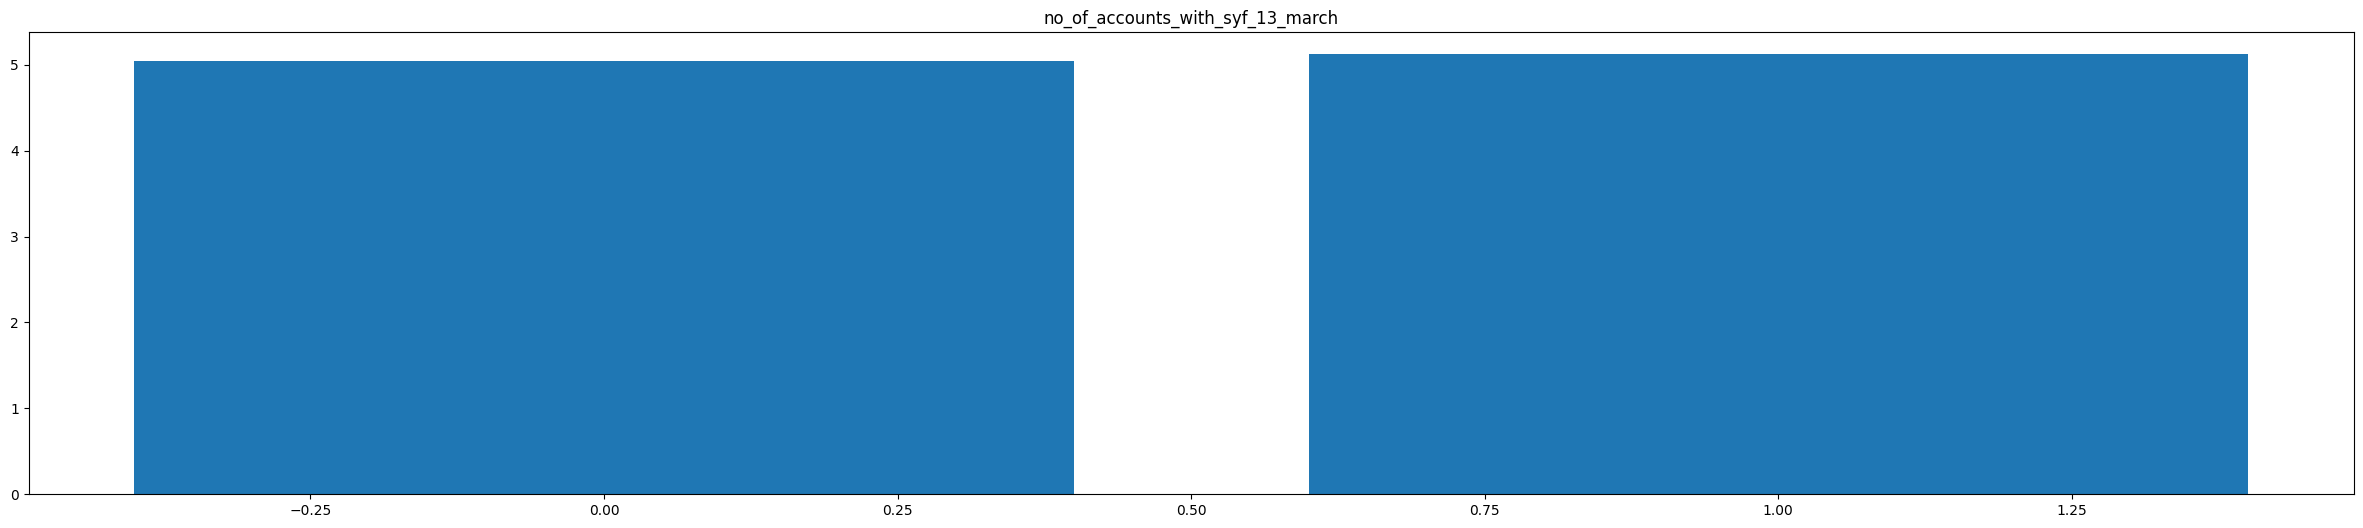

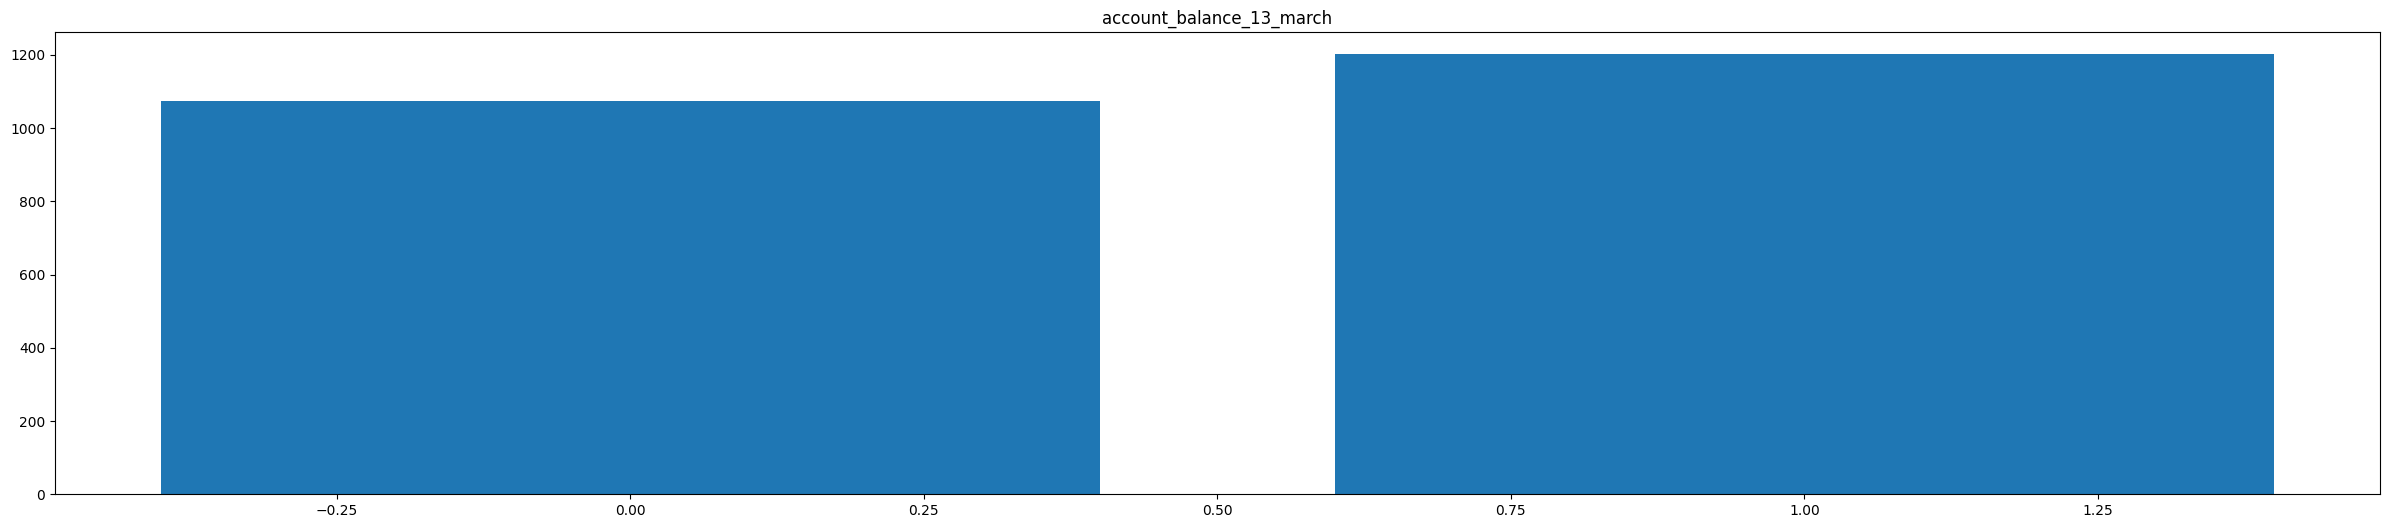

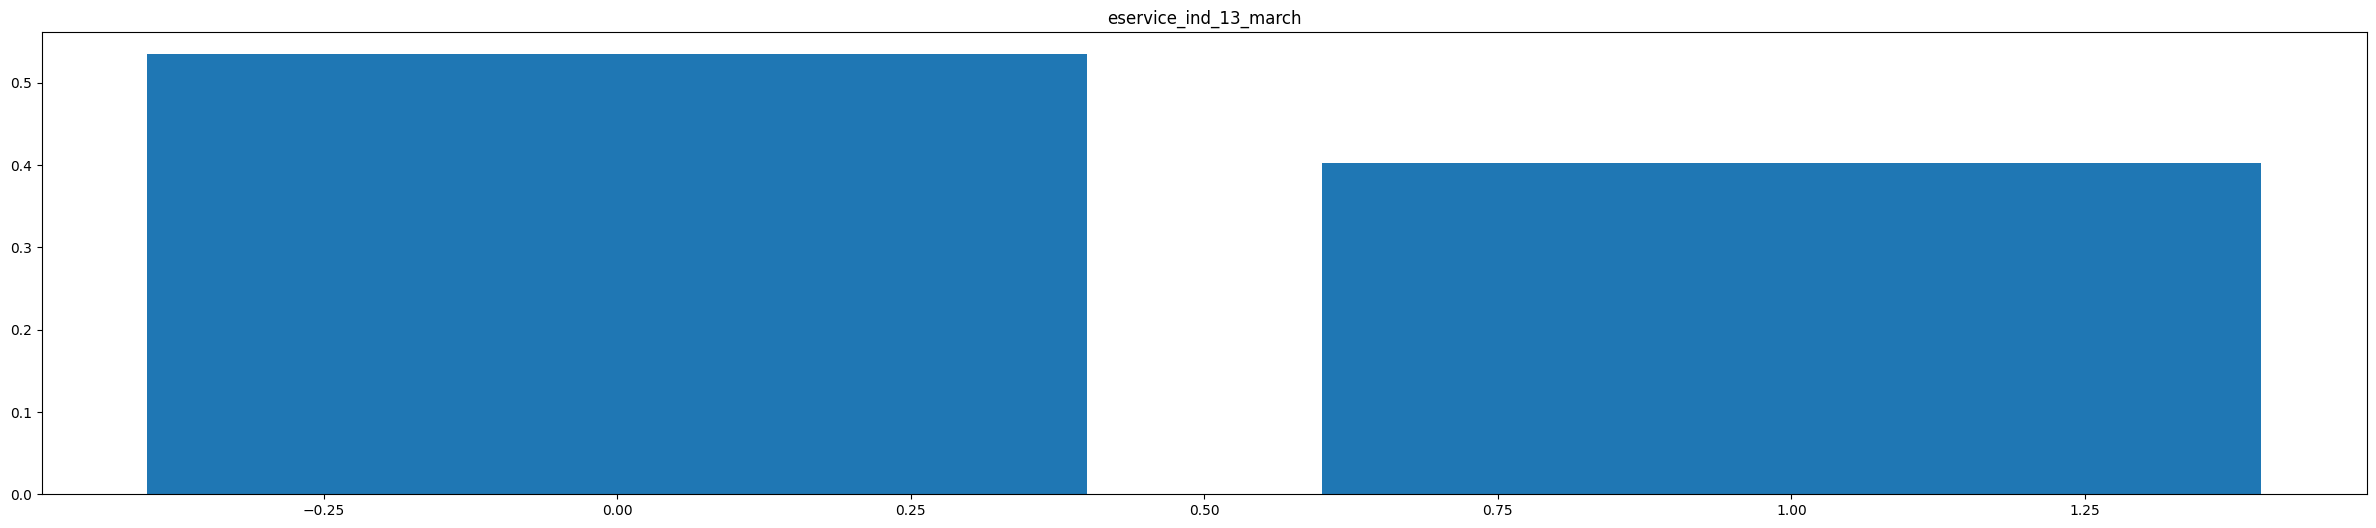

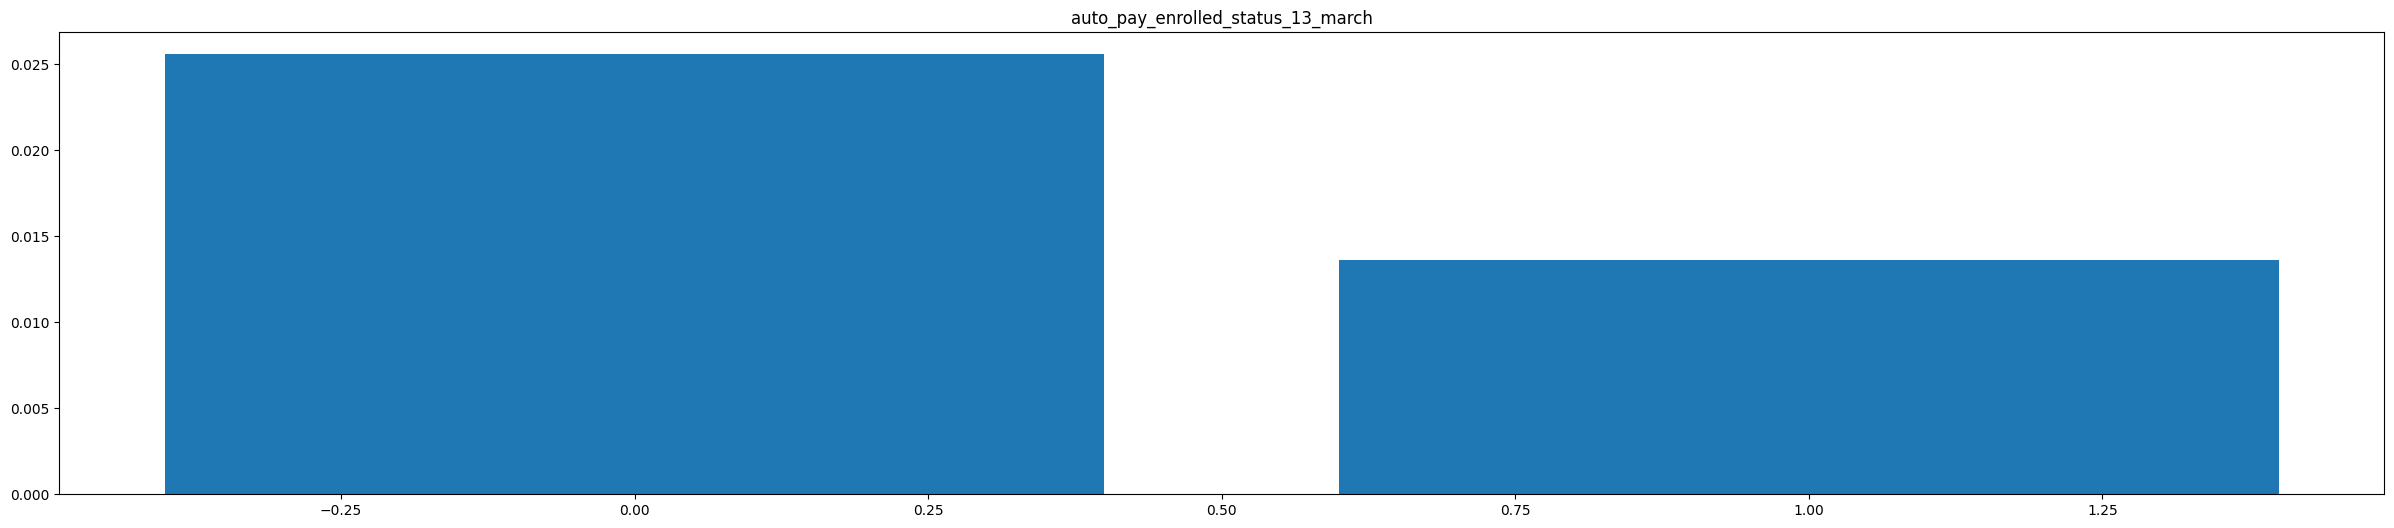

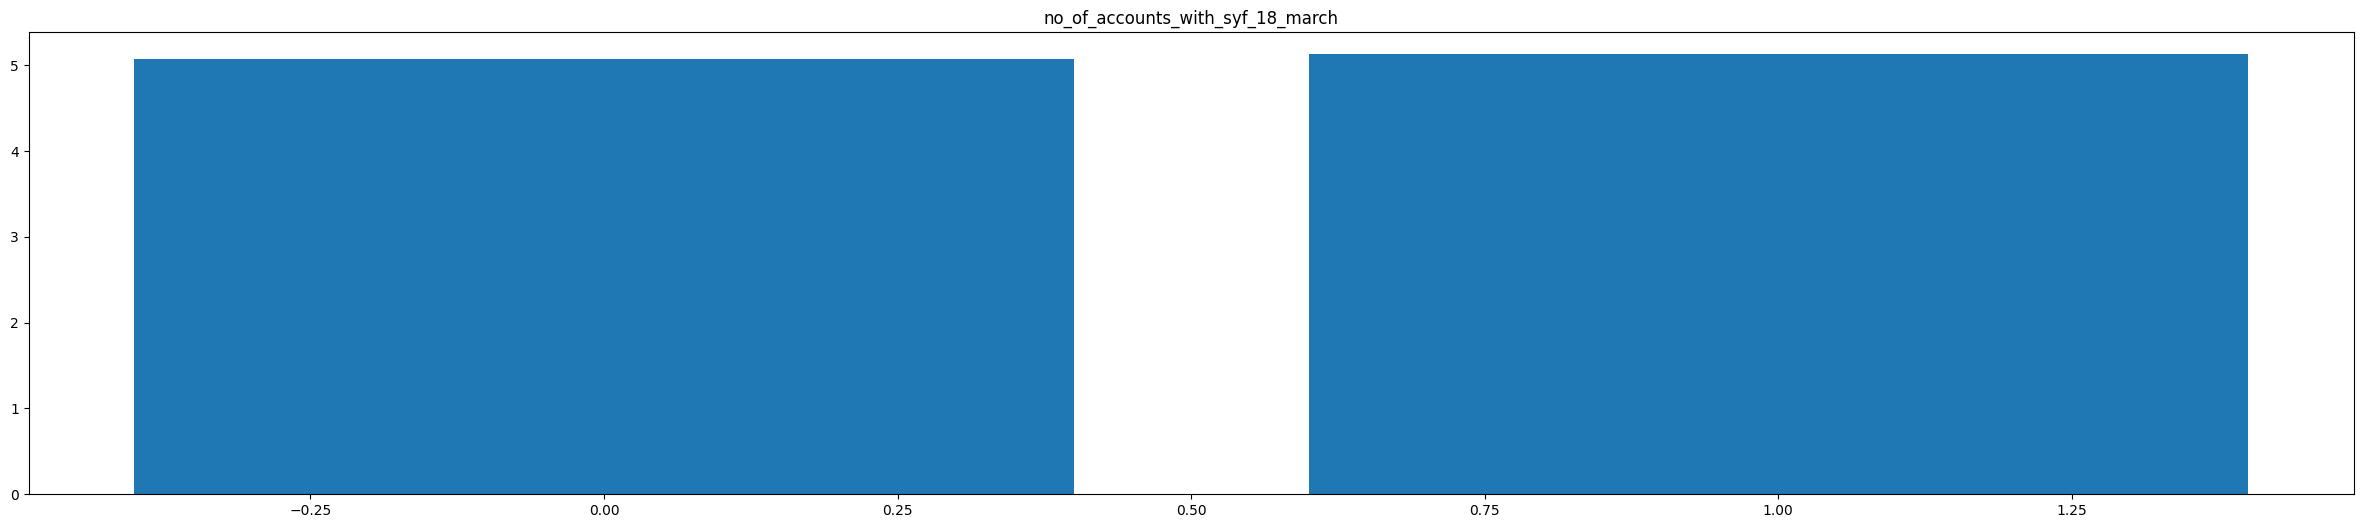

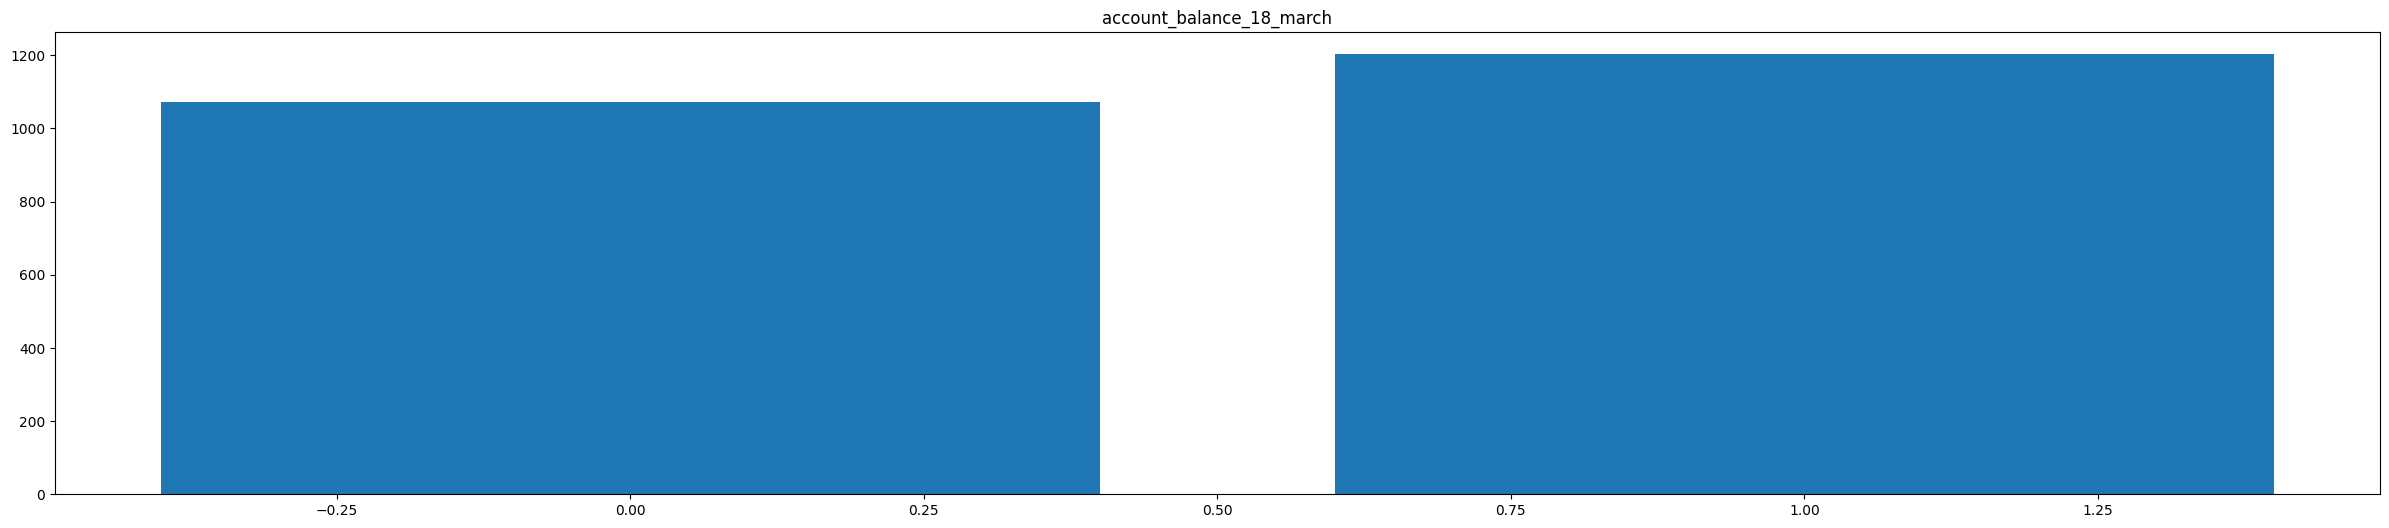

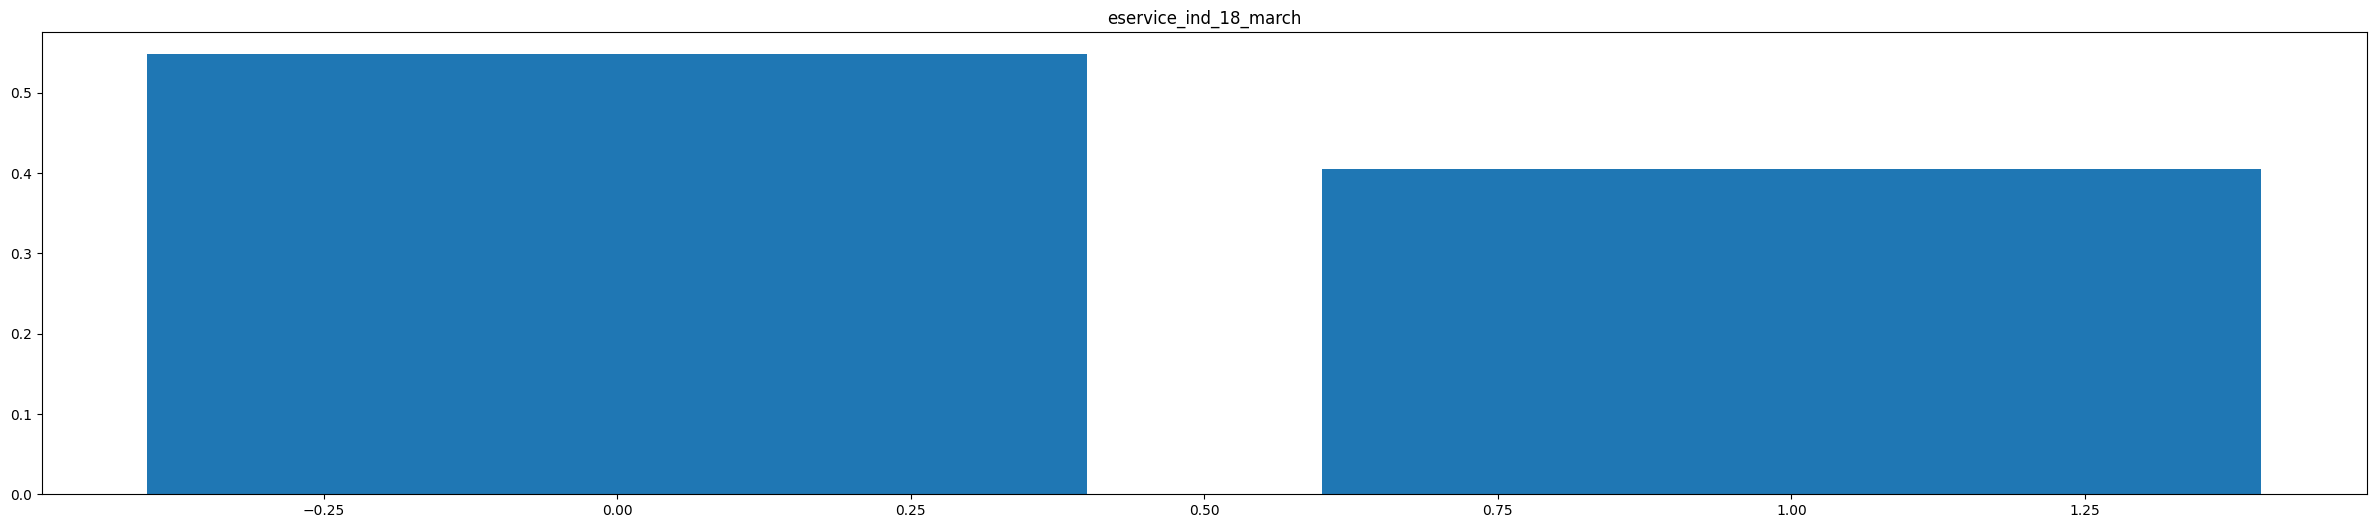

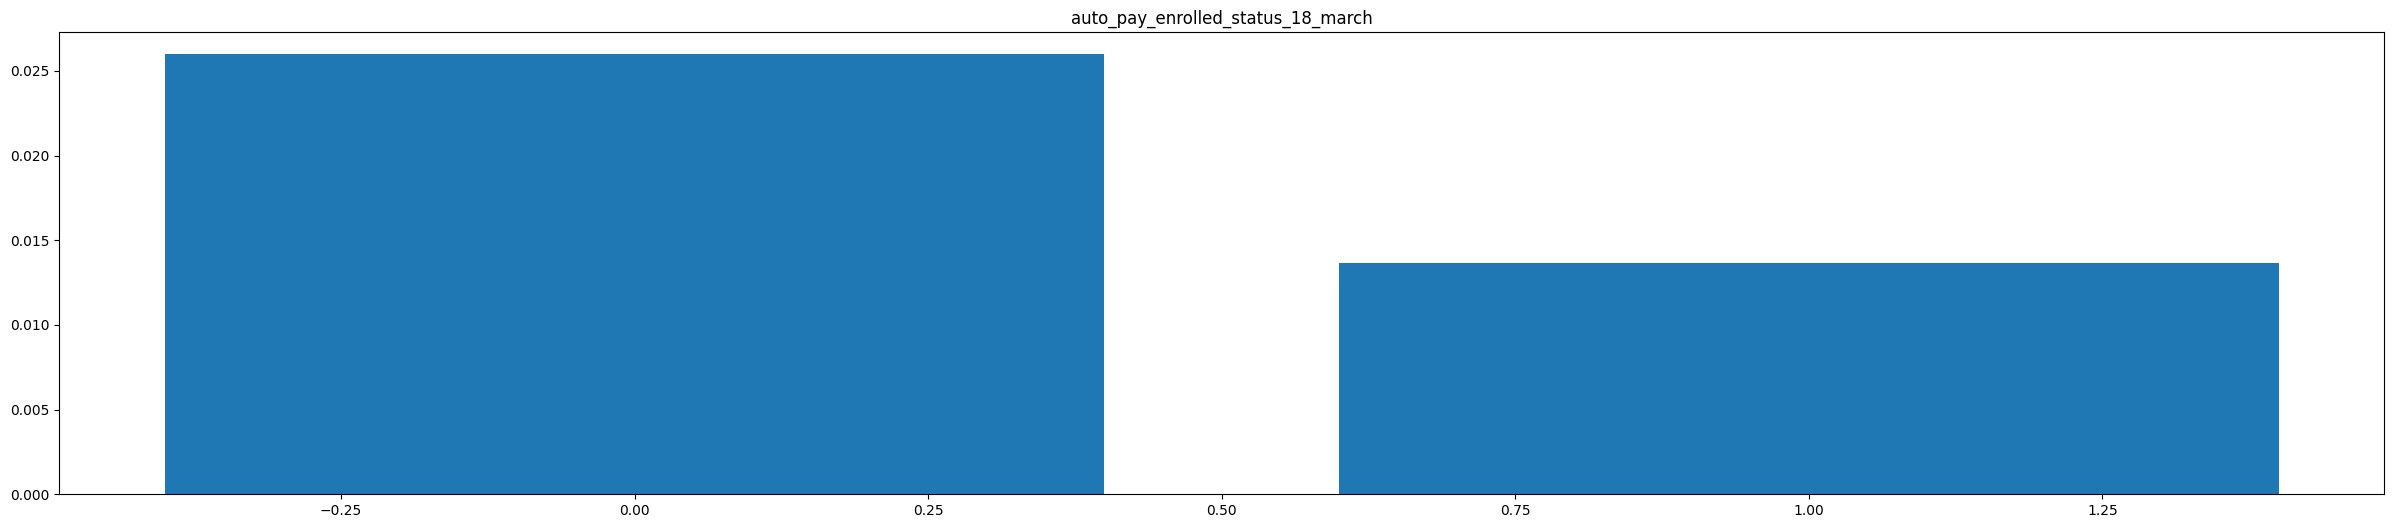

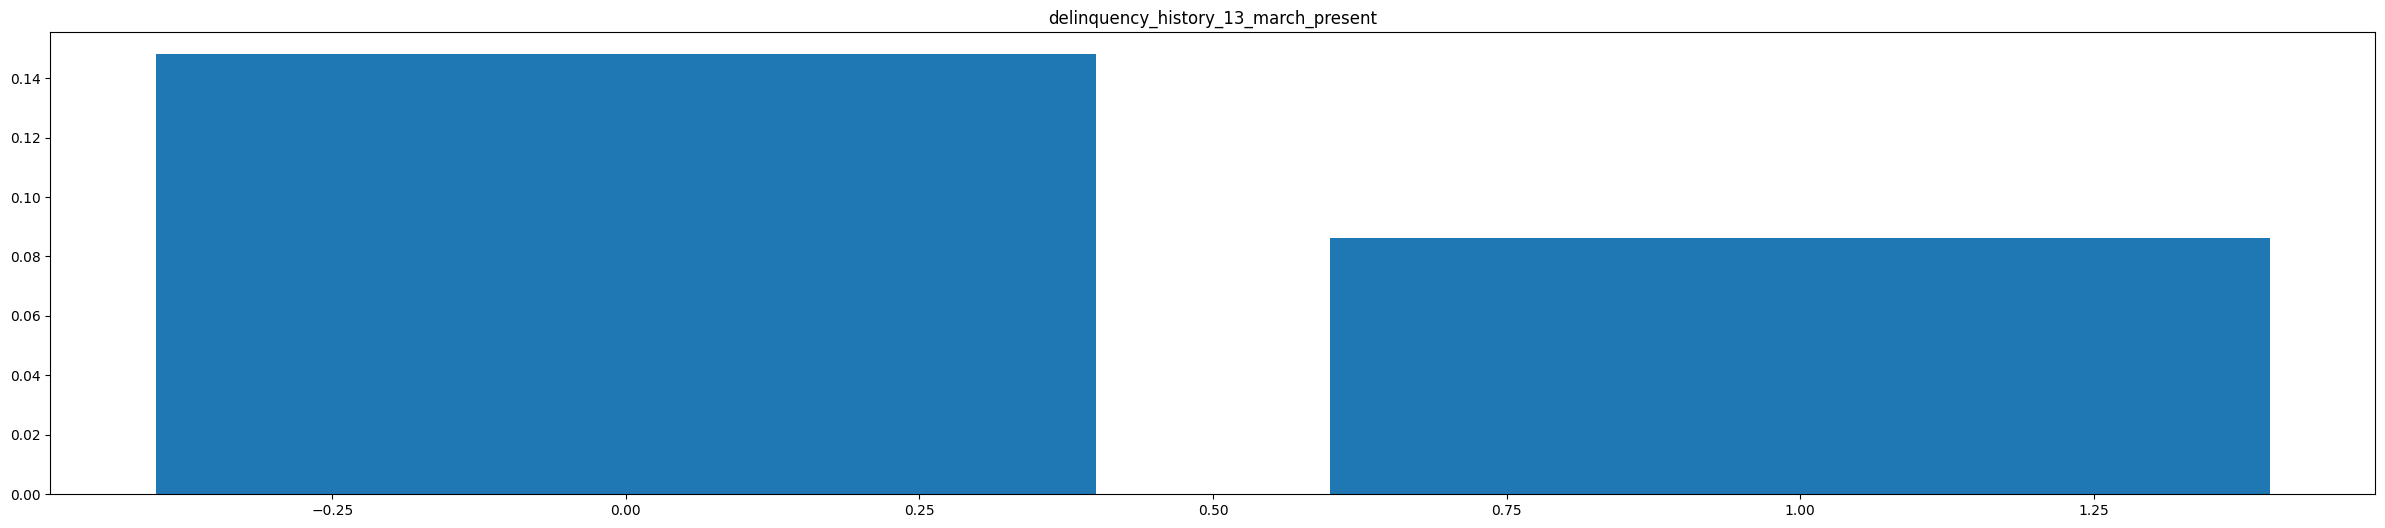

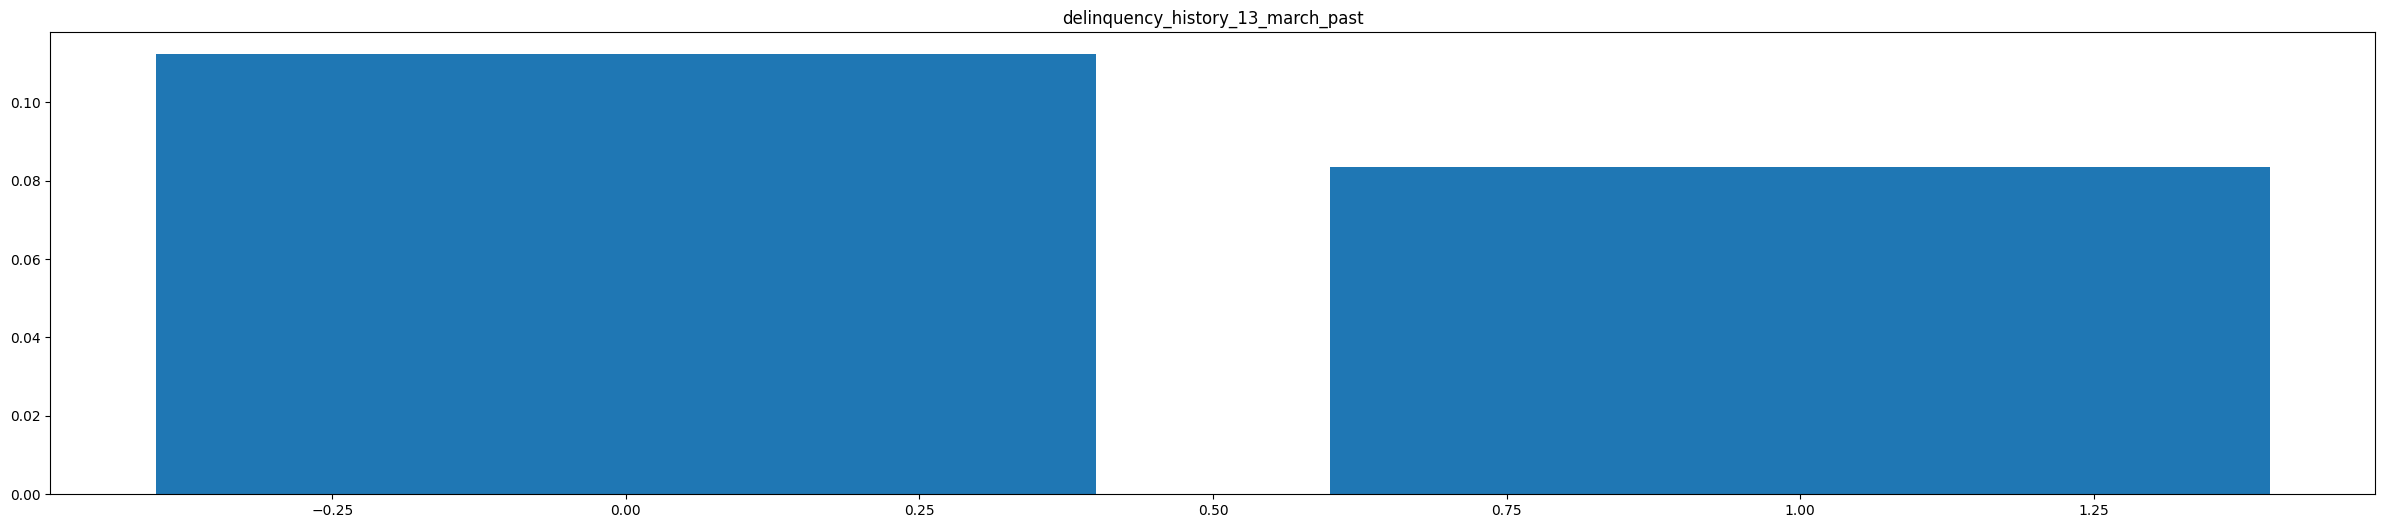

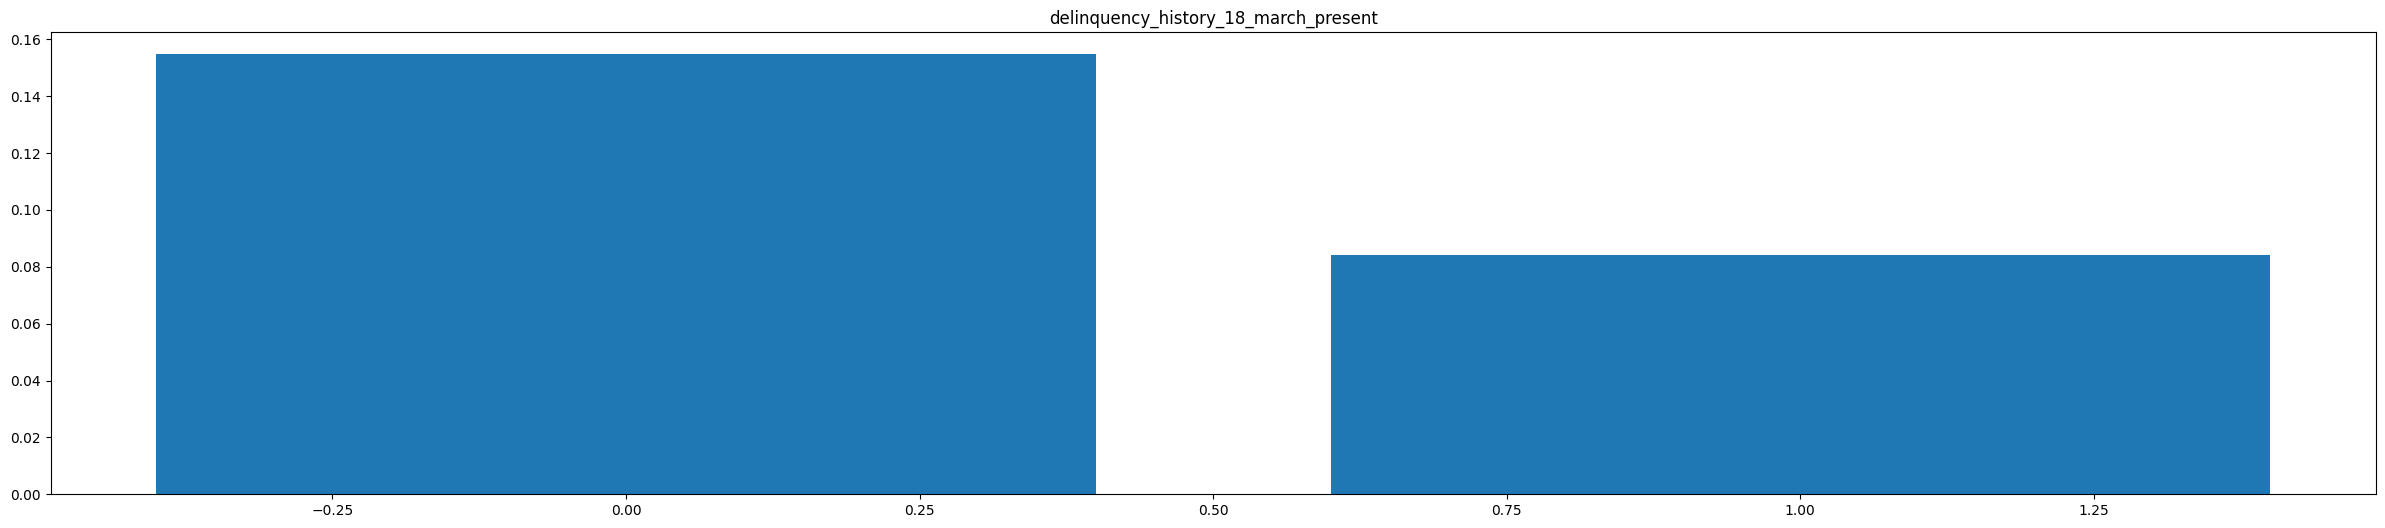

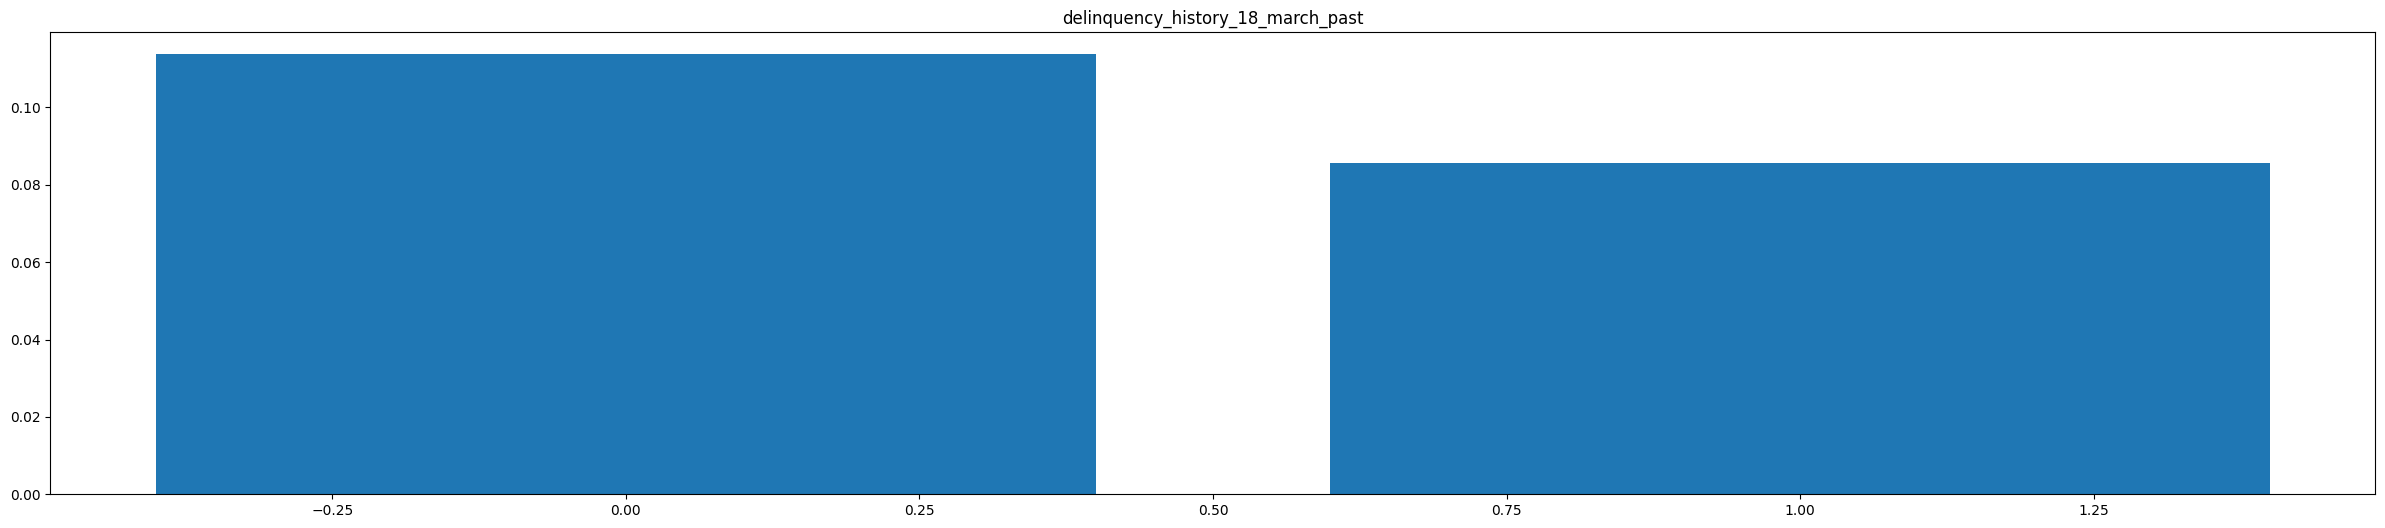

In [7]:
# indices = [f"{index[0]}, {index[1]}" for index in agg_mean.index]
indices = agg_mean.index
for col in agg_mean.columns:
    plt.figure( figsize=(30, 6))
    plt.title(col)
    plt.bar(indices, agg_mean[col])

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [56]:
reason_encoder = LabelEncoder()
encoded_call_codes = reason_encoder.fit_transform(df["reason"])
df["reason"] = encoded_call_codes

max_mos = len(max(df["mos"])) / 3 + 1


In [57]:
external_status_encoder = LabelEncoder()
encoded_status_codes = external_status_encoder.fit_transform(df["account_status_18_march"])
df["account_status_18_march"] = encoded_status_codes
df["account_status_13_march"] = encoded_status_codes

In [58]:
ebill_encoder = LabelEncoder()
encoded_ebill_status = ebill_encoder.fit_transform(df["ebill_enrolled_status_18_march"])
df["ebill_enrolled_status_18_march"] = encoded_ebill_status
df["ebill_enrolled_status_13_march"] = encoded_ebill_status



In [60]:
df = df.drop(["retailer_code", "mos", "serial"], axis=1)
X = df.drop('resolved', axis=1)
y = df['resolved']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [62]:
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
1,reason,0.232918
23,time_of_day,0.105198
0,index,0.097332
4,account_open_date_13_march,0.089561
12,account_open_date_18_march,0.089502
11,account_balance_18_march,0.082472
3,account_balance_13_march,0.081197
2,no_of_accounts_with_syf_13_march,0.040466
10,no_of_accounts_with_syf_18_march,0.040151
22,day,0.024597


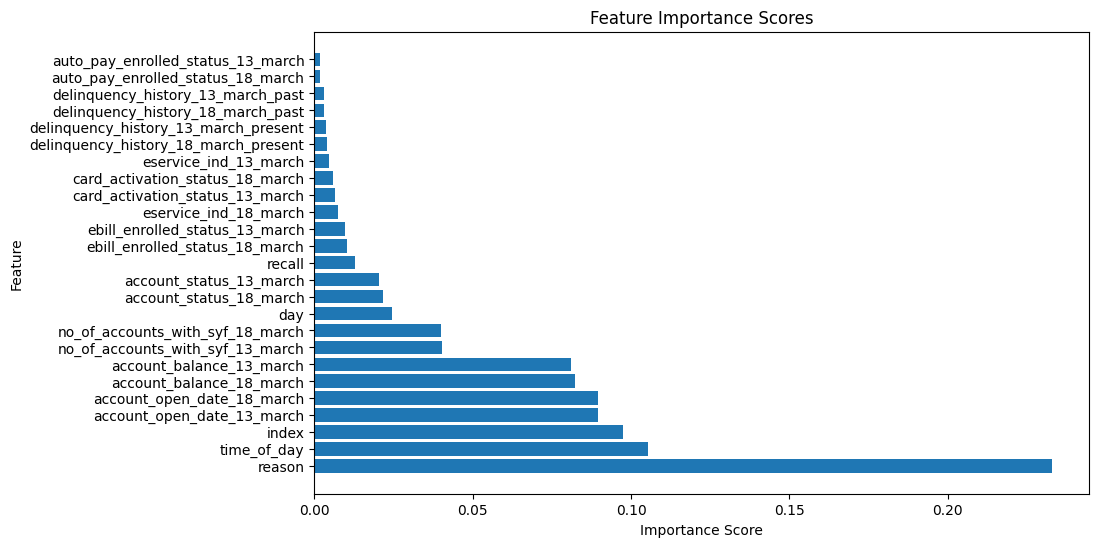

In [63]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance Scores')
plt.show()